# Using the `.h5` File with c58R Bands to Fit

In the previous notebook `c58R_band_extraction.ipynb` (this directory) I got the c58R bands from the `ROOT` file and put them into the `.h5` file below. Now I work with those bands to try to fit the shape of the bands using the known yield distribution and a generic resolution function. 

In [1]:
import numpy as np

#play around with some hits data stored in h5 file
#===============to suppress h5py warning see:
#https://github.com/h5py/h5py/issues/961
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()

In [2]:
#open file

f = h5py.File("data/c58R_bands.h5","r")

nrminx = np.asarray(f['c58R_bands/nrmin_x'])
nrminy = np.asarray(f['c58R_bands/nrmin_y'])
nrmaxx = np.asarray(f['c58R_bands/nrmax_x'])
nrmaxy = np.asarray(f['c58R_bands/nrmax_y'])

In [3]:
#test out the plotting 
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

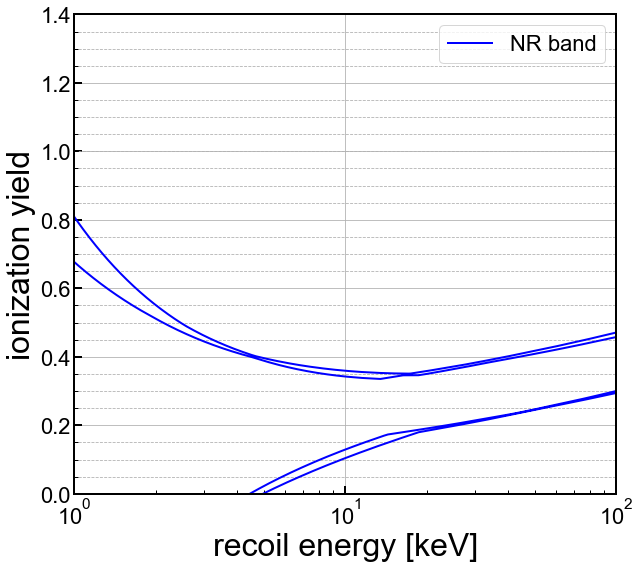

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=100
ymin=0.0
ymax=1.4
ax1.plot(nrmaxx,nrmaxy,color='b', linestyle='-', \
         label='NR band', linewidth=2)
ax1.plot(nrminx,nrminy,color='b', linestyle='-', \
         label=None, linewidth=2)


#ax1.plot(ermaxx,ermaxy,color='r', linestyle='-', \
#         label='ER band', linewidth=2)
#ax1.plot(erminx,erminy,color='r', linestyle='-', \
#         label=None, linewidth=2)


#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_xscale('log')
ax1.set_xlim(1, xmax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()